Deal with unlabeled bbox (remove car IDs)
Goal: associate measurements to unique objects
1. try stitching objects in mutl-camera road

In [2]:
from utils import *
import importlib
import utils
importlib.reload(utils)
import os.path
from os import path
import pandas as pd
import utils_optimization as opt
importlib.reload(opt)
import data_association as da
importlib.reload(da)
import time
import numpy.linalg as LA


In [3]:
# read & rectify each camera df individually

data_path = pathlib.Path().absolute().joinpath('../June_5min')
tform_path = pathlib.Path().absolute().joinpath('../tform')


In [65]:
DA_path = data_path.joinpath('DA')
DA_files = next(os.walk(DA_path), (None, None, []))[2] 
rectified_files = next(os.walk(data_path.joinpath('rectified')), (None, None, []))[2]

for root,dirs,files in os.walk(str(data_path), topdown = True):
    for file in files:
        if file.endswith(".csv"):# and file.startswith('p2c4_0'):
            
            if file[5]=='0':
                print(file)
                # ... reading & preprocessing ...
                DA_file = 'DA_' + file
                new_name = 'rectified_' + file
                if new_name not in rectified_files:
                    
                    if DA_file not in DA_files:
                        file_path = data_path.joinpath(file)
                        df = utils.preprocess(file_path, tform_path, skip_row = 0)
                        df = df.sort_values(by=['Frame #','Timestamp']).reset_index(drop=True)
                        df = utils.preprocess_data_association(df)
                        df.to_csv(DA_path.joinpath(DA_file), index=False)

                    else:
                        file_path = DA_path.joinpath(DA_file)
                        print(DA_file)
                        df = utils.read_data(file_path)
                        camera = utils.find_camera_name(file)
                        df = utils.img_to_road(df, tform_path,camera)
                        df = df.groupby("ID").apply(reorder_points).reset_index(drop=True)

                        # ... rectifying ...
                        df = opt.rectify(df)

                        # ... post processing ...
                        df = utils.post_process(df)

                        # ... saving ...
                        df.to_csv(data_path.joinpath('rectified/',new_name), index=False)
                        print('saved.')
            
    break

p1c2_0_track_outputs_3D.csv
DA_p1c2_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 843/843 [02:39<00:00,  5.29it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
121.91405059433099 225.54099359951235


100%|████████████████████████████████████████████████████████████████████████████████| 824/824 [00:13<00:00, 60.95it/s]


standardize format for plotter...
saved.
p1c3_0_track_outputs_3D.csv
DA_p1c3_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 756/756 [02:07<00:00,  5.93it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
182.87107589149647 243.82810118866198


100%|████████████████████████████████████████████████████████████████████████████████| 740/740 [00:12<00:00, 60.78it/s]


standardize format for plotter...
saved.
p1c4_0_track_outputs_3D.csv
DA_p1c4_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 648/648 [01:46<00:00,  6.06it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
182.87107589149647 243.82810118866198


100%|████████████████████████████████████████████████████████████████████████████████| 636/636 [00:12<00:00, 52.82it/s]


standardize format for plotter...
saved.
p1c5_0_track_outputs_3D.csv
DA_p1c5_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 846/846 [02:23<00:00,  5.90it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
201.15818348064613 292.5937214263944


100%|████████████████████████████████████████████████████████████████████████████████| 831/831 [00:12<00:00, 64.68it/s]


standardize format for plotter...
saved.
p1c6_0_track_outputs_3D.csv
DA_p1c6_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 792/792 [03:01<00:00,  4.36it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
231.63669612922888 365.74215178299295


100%|████████████████████████████████████████████████████████████████████████████████| 786/786 [00:12<00:00, 61.83it/s]


standardize format for plotter...
saved.
p2c1_0_track_outputs_3D.csv
DA_p2c1_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 876/876 [02:20<00:00,  6.26it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
121.91405059433099 274.30661383724475


100%|████████████████████████████████████████████████████████████████████████████████| 845/845 [00:12<00:00, 65.83it/s]


standardize format for plotter...
saved.
p2c2_0_track_outputs_3D.csv
DA_p2c2_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 848/848 [01:55<00:00,  7.33it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
182.87107589149647 280.40231636696126


100%|████████████████████████████████████████████████████████████████████████████████| 768/768 [00:12<00:00, 60.64it/s]


standardize format for plotter...
saved.
p2c3_0_track_outputs_3D.csv
DA_p2c3_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 263/263 [00:40<00:00,  6.52it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
213.34958854007922 316.97653154526057


100%|████████████████████████████████████████████████████████████████████████████████| 198/198 [00:12<00:00, 15.94it/s]


standardize format for plotter...
saved.
p2c4_0_track_outputs_3D.csv
p2c5_0_track_outputs_3D.csv
DA_p2c5_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 847/847 [01:59<00:00,  7.09it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
237.73239865894544 323.07223407497713


100%|████████████████████████████████████████████████████████████████████████████████| 791/791 [00:12<00:00, 61.13it/s]


standardize format for plotter...
saved.
p2c6_0_track_outputs_3D.csv
DA_p2c6_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 858/858 [02:23<00:00,  5.99it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
243.82810118866198 353.5507467235599


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:13<00:00, 62.48it/s]


standardize format for plotter...
saved.
p3c1_0_track_outputs_3D.csv
DA_p3c1_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 863/863 [02:33<00:00,  5.61it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
243.82810118866198 426.69917708015845


100%|████████████████████████████████████████████████████████████████████████████████| 847/847 [00:13<00:00, 62.76it/s]


standardize format for plotter...
saved.
p3c2_0_track_outputs_3D.csv
DA_p3c2_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 857/857 [02:02<00:00,  6.99it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
350.5028954587016 441.9384334044498


100%|████████████████████████████████████████████████████████████████████████████████| 818/818 [00:13<00:00, 60.92it/s]


standardize format for plotter...
saved.
p3c3_0_track_outputs_3D.csv
DA_p3c3_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 805/805 [01:52<00:00,  7.16it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
371.8378543127095 487.65620237732395


100%|████████████████████████████████████████████████████████████████████████████████| 748/748 [00:12<00:00, 58.63it/s]


standardize format for plotter...
saved.
p3c4_0_track_outputs_3D.csv
DA_p3c4_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 440/440 [01:11<00:00,  6.13it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
371.8378543127095 487.65620237732395


100%|████████████████████████████████████████████████████████████████████████████████| 433/433 [00:12<00:00, 35.33it/s]


standardize format for plotter...
saved.
p3c5_0_track_outputs_3D.csv
DA_p3c5_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 875/875 [02:35<00:00,  5.63it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
411.4599207558671 548.6132276744895


100%|████████████████████████████████████████████████████████████████████████████████| 854/854 [00:13<00:00, 63.94it/s]


standardize format for plotter...
saved.
p3c6_0_track_outputs_3D.csv
DA_p3c6_0_track_outputs_3D.csv
Rectifying...


100%|████████████████████████████████████████████████████████████████████████████████| 507/507 [01:20<00:00,  6.26it/s]


cap width at 2.59m...
extending tracks to edges of the frame...
481.5604998476074 609.570252971655


100%|████████████████████████████████████████████████████████████████████████████████| 473/473 [00:12<00:00, 37.09it/s]


standardize format for plotter...
saved.


6240


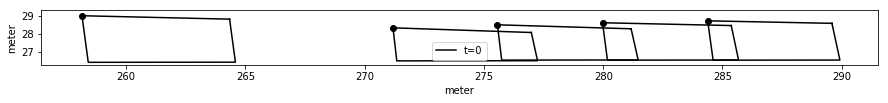

runtime 3.4011430740356445


In [52]:
import utils_optimization as opt
importlib.reload(opt)
import time

df = utils.read_data(data_path.joinpath('DA/DA_p2c4_0_track_outputs_3D.csv'))
# correct = utils.read_data(data_path.joinpath('rectified/rectified_p1c5_0_track_outputs_3D.csv'))
# dfre = utils.read_data(data_path.joinpath('rectified/rectified_p1c2_2_track_outputs_3D.csv'))
car = df[df['ID']==6240]
# car_correct = correct[correct['ID']==4150]
# utils.plot_track_compare(car,car_correct)
# car = utils.reorder_points(car)
pre = car.copy()
pre = utils.img_to_road(pre, tform_path,'p2c4')
pre = utils.reorder_points(pre)
post = pre.copy()

t = time.time()
post = opt.rectify_single_camera(post)
print('runtime', time.time()-t)


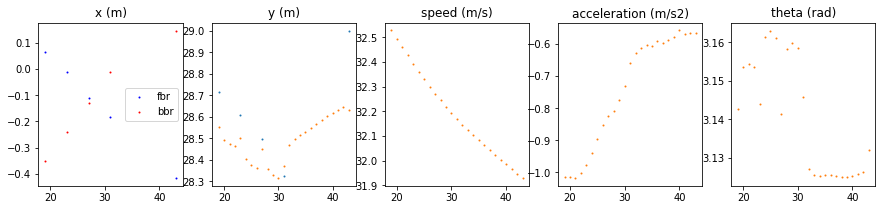

In [53]:
import utils
importlib.reload(utils)
# dfw = post.copy()
# dfw = dfw.groupby("ID").apply(utils.width_filter).reset_index(drop=True)
utils.dashboard([pre,post])

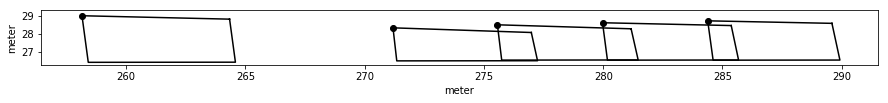

1.979532964597272 5.62529004588967


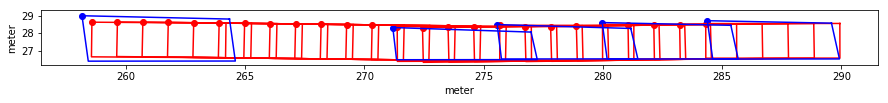

In [54]:
utils.plot_track_df(pre)
utils.plot_track_compare(post, pre)
# utils.plot_track_df(pre[:10])

print(post['width'].values[0],post['length'].values[0])

In [55]:
ext=utils.extend_prediction(post,(700/3.281,1040/3.281,8998))

6240


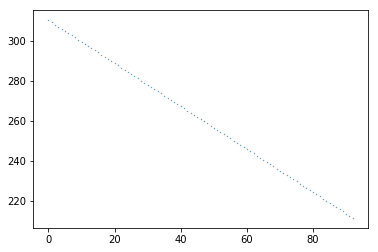

In [56]:
plt.scatter(ext['Frame #'].values, ext['x'].values, s=0.1)

0.25689791905657383


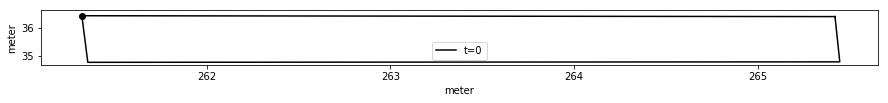

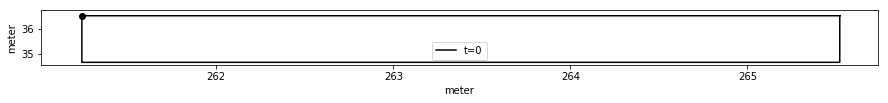

0.2612311596103097


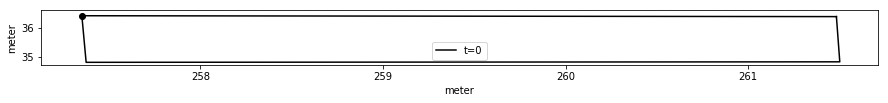

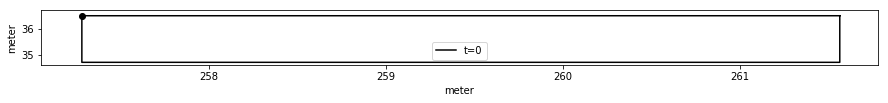

0.2934272266790577


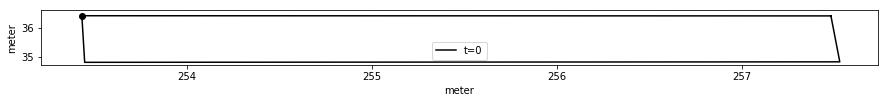

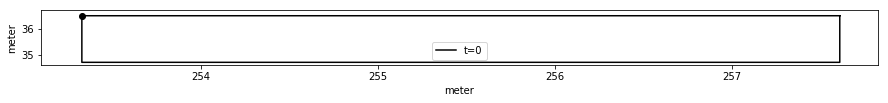

0.2707899542641151


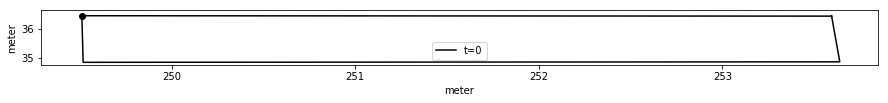

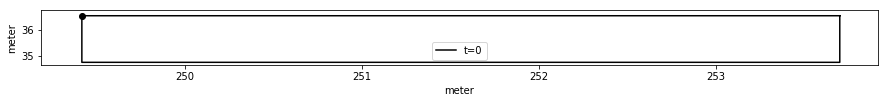

0.1933556639930861


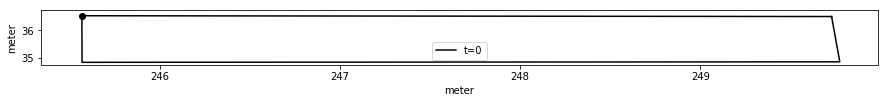

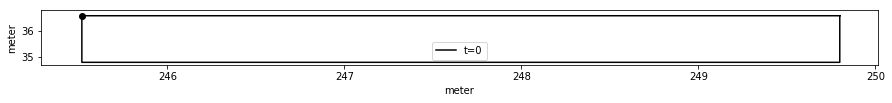

0.11231031000945771


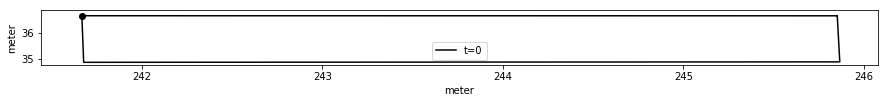

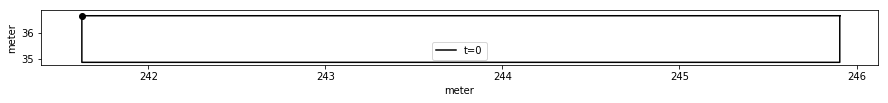

0.05615117530261385


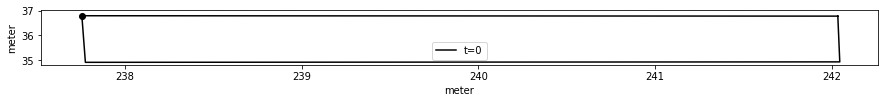

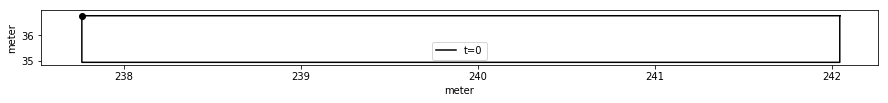

0.18304830865036803


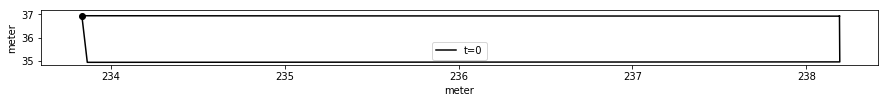

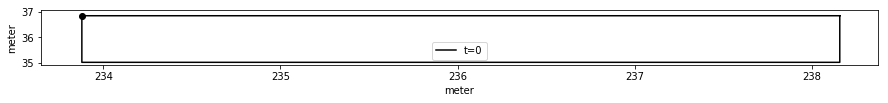

0.2645249352794007


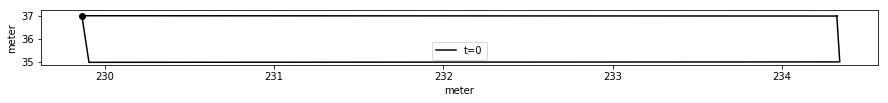

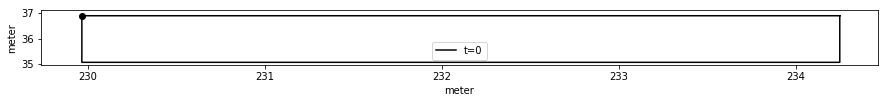

0.3805606123942617


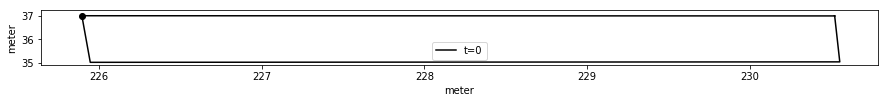

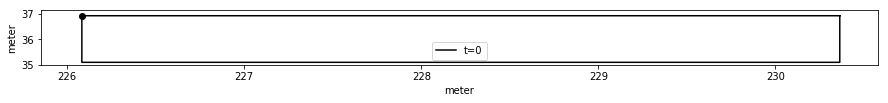

0.5980736274314714


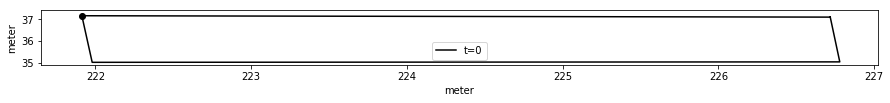

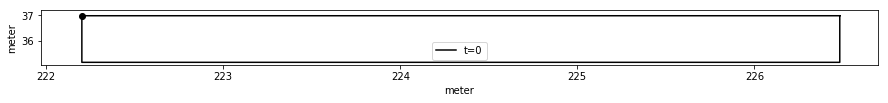

In [61]:
import utils_optimization as opt
importlib.reload(opt)
w = post['width'].values[0]
l = post['length'].values[0]
for i in range(len(pre)):
    if ~np.isnan(pre['bbr_x'].iloc[i]):
        Y1 = np.array(pre[pts])[i:i+1,:]
#         Y1 += np.random.normal(0, 0.1, Y1.shape)
        opt.score_for_box(w,l,Y1)

In [6]:
# visualize footprint on the camera video
import utils
importlib.reload(utils)
import plot_rectified_objects
importlib.reload(plot_rectified_objects)

video = str(data_path.joinpath('raw_video/p1c5_0.mp4'))
label_file = str(data_path.joinpath('rectified/rectified_p1c5_0_track_outputs_3D.csv')) 
# # label_file = str(data_path.joinpath('rectified/p1_all/rectified_p1c3.csv')) 
# # label_file = str(data_path.joinpath('rectified/uncorrected_individual/rectified_p1c3_uncorrected.csv'))
# # label_file = str(data_path.joinpath('rectified/uncorrected_all/rectified_p1c3.csv'))
plot_rectified_objects.plot_vehicle_csv(video,label_file, frame_rate = 0,show_2d = True,show_3d = True,show_LMCS = True,show_rectified = False, ds=True)


[[-5.37306843e+00  2.52187905e+00  3.55189055e+03]
 [ 1.84293002e+00  1.61404805e+00 -1.82243624e+03]
 [-1.90535918e-03 -1.68429848e-03  1.00000000e+00]]


KeyboardInterrupt: 

In [10]:
import numpy
M = numpy.array([[-5.37306843e+00,  2.52187905e+00,  3.55189055e+03],
 [ 1.84293002e+00,  1.61404805e+00, -1.82243624e+03],
 [-1.90535918e-03, -1.68429848e-03,  1.00000000e+00]])

In [11]:
numpy.linalg.svd(M)

(array([[-8.89720636e-01, -4.56505403e-01,  8.31223867e-05],
        [ 4.56505342e-01, -8.89720388e-01,  7.10720452e-04],
        [-2.50492044e-04,  6.70288466e-04,  9.99999744e-01]]),
 array([3.99214669e+03, 2.71207391e+00, 1.09243138e-03]),
 array([[ 1.40822424e-03, -3.77477576e-04, -9.99998937e-01],
        [ 2.99822610e-01, -9.53994649e-01,  7.82329886e-04],
        [-9.53993930e-01, -2.99823393e-01, -1.23026208e-03]]))

In [13]:
numpy.linalg.cond(M)

3654368.3727498758

In [15]:
M*inv(M)

NameError: name 'inv' is not defined

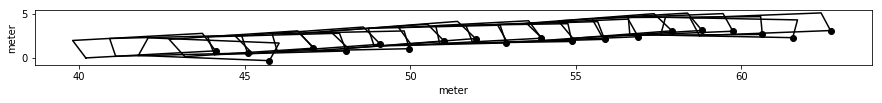

In [555]:
N = 20
wt = 2
lt = 4
x0t = 40
y0t = 1
thetat = np.array([0.1]*N)+np.random.normal(0, 0.1, N)
# thetat = np.sin(np.arange(0,N/50,1/50))#+np.random.normal(0, 0.1, N)
vt = np.array([30.0]*N)+np.random.normal(0, 1, N)
# vt = np.sin(np.arange(0,N/10,1/10))*5 + 30 #+np.random.normal(0, 0.1, N)
Y = generate(wt,lt,x0t,y0t,thetat,vt)
# Y = Y+np.random.normal(0, 0.1, Y.shape)

nans = np.array([True] * len(Y))
nans[::1] = False
Y[nans,:] = np.nan
pts = ['bbr_x','bbr_y', 'fbr_x','fbr_y','fbl_x','fbl_y','bbl_x', 'bbl_y']
car = pd.DataFrame(Y, columns = pts)
car['Timestamp'] = np.arange(0,N/30,1/30)
car['Frame #'] = np.arange(20,N+20)

vt[nans] = np.nan
car['speed'] = vt
thetat[nans]=np.nan
car['theta'] = thetat
at = list(np.diff(vt)/(1/30))
at.append(0)
at=np.array(at)
at[nans]=np.nan
car['acceleration'] = at
car['direction'] = np.sign(np.cos(thetat[0]))
car['ID'] = 0
utils.plot_track_df(car)

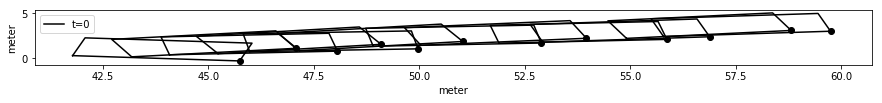

30.348105506180495


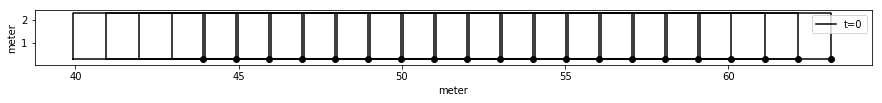

69.09135357325214 ['requested number of basinhopping iterations completed successfully']
score: 0.003947871502198299
4.934630657375681
2.0001663211630456 4.000191305702039


In [556]:
import utils_optimization as opt
importlib.reload(opt)
re = car.copy()
re = opt.rectify_single_camera(re)
print(re['width'].values[0],re['length'].values[0])

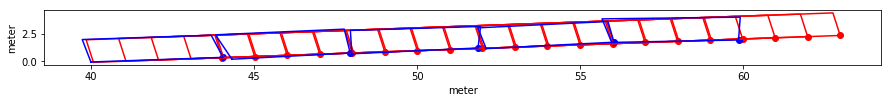

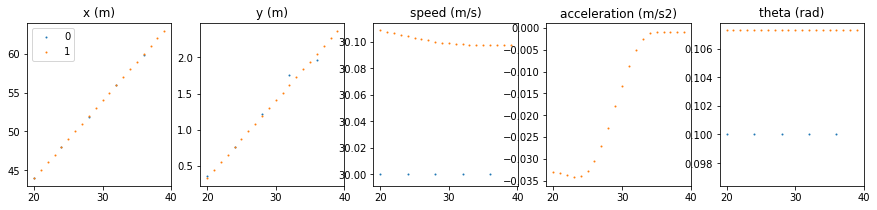

In [481]:
import utils
importlib.reload(utils)
# utils.plot_track_df(re)
utils.plot_track_compare(re,car)
utils.dashboard([car,re])

In [68]:
# make an animation based on LMCS
import os
import glob
import importlib
import animation_utils as an
importlib.reload(an)
image_folder = '../FramePic'

filelist = glob.glob(os.path.join(image_folder, "*"))
for f in filelist:
    os.remove(f)
    
if len(df['camera'].unique())==1:
    dim0 = get_camera_range(df['camera'][0])
else:
    dim0 = get_camera_range('all')
print(dim0)
dim = [d * 3.281 for d in dim0] # convert meter to feet
an.generate_frames(df, dim, skip_frame=1, image_folder=image_folder)

(0, 130, -5, 45)
Frame:  0 8994


In [69]:
# Fetch image files from the folder, and create an animation.
importlib.reload(an)
video_name = '../p1c1_uncorrected5min_DA.mp4'
an.write_video(image_folder, video_name, fps=30)